# MathAData - Geometry, lines

## Image classification of 2s and 7s

!!! abstract Goal of the Lab  
In this Notebook, we will build an algorithm that predicts whether a 2 or a 7 is written on an image.  
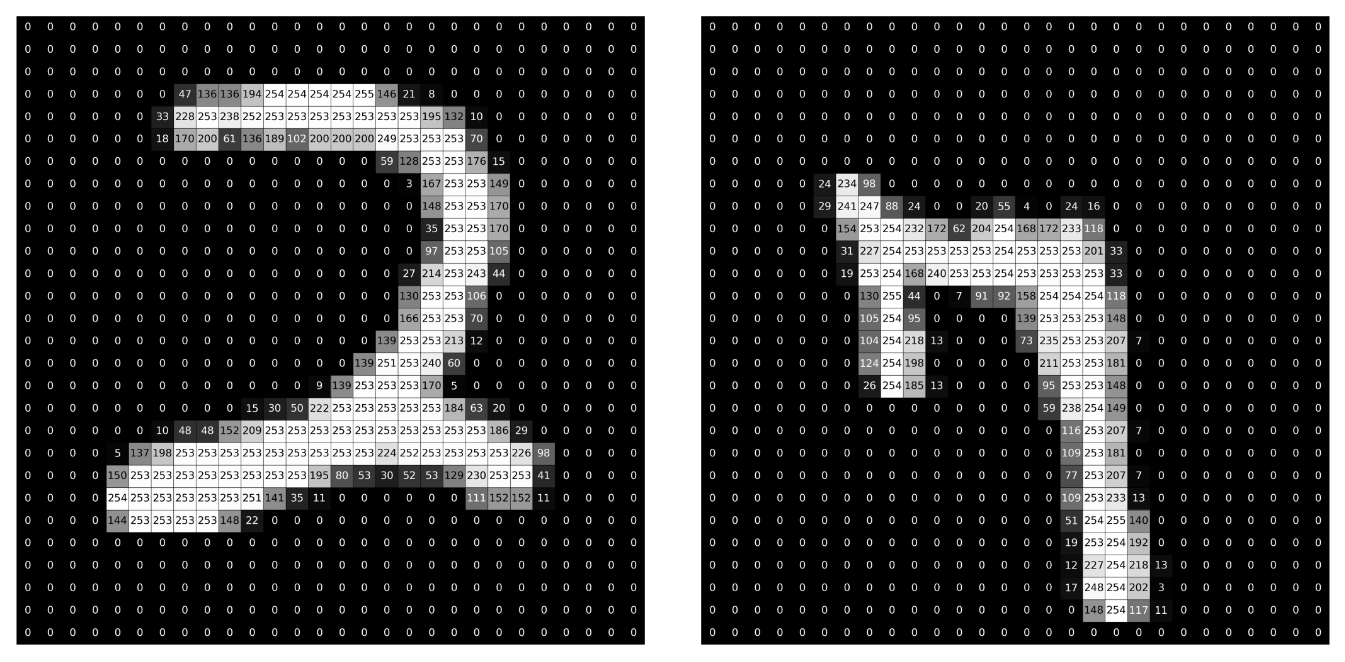  
!!!

!!! tip Execute a cell  
To start, click on the code cell below then press the <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">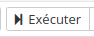</span> button or the keyboard keys <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">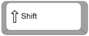</span>+<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">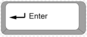</span>  
When the code has been executed, a number will appear between the brackets on the left: <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!

In [ ]:
from utilitaires_droite import *
from utilitaires_mnist import *

!!! tip Database  
Run the following cell to display the data.  
!!!

In [ ]:
display_bank()

validation_execution()

!!! question How many real images of 7 are present among the first 10 images?  
**Replace the `...`** in the following cell with your answer **then execute it**.  
!!!

In [ ]:
Count_7 = ...

# DO NOT TOUCH THIS LINE
validation_execution_nombre_7()

!!! question How many images does the database contain?  
**Replace the `...`** in the following cell with your answer **then execute it**.  
!!!

In [ ]:
Count_total = ...

# DO NOT TOUCH THIS LINE
validation_execution_nombre_total()

## Starting Point

!!! tip How an algorithm works  
An algorithm receives a data, performs operations, and gives an answer.  
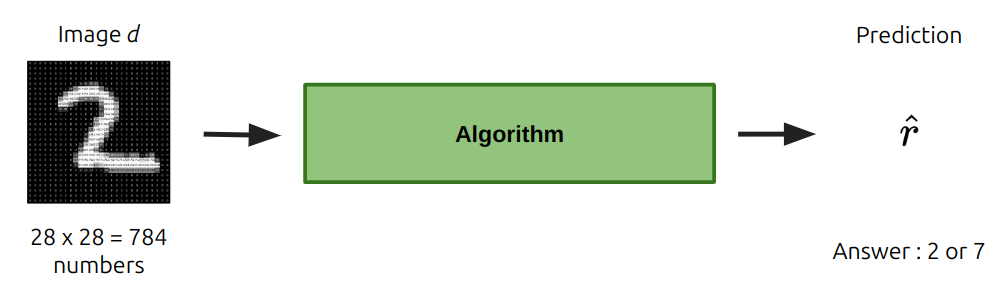  
!!!
!!! abstract Lazy algorithm: Always returns 2.  
LucIA doesn't want to tire herself out and proposes a very simple algorithm **that always returns 2**.  
!!!

In [ ]:
import utilitaires_common

def algorithm(d):
    return 2

validation_execution_algo_fixe()

!!! question What does the lazy algorithm answer for these three images?  
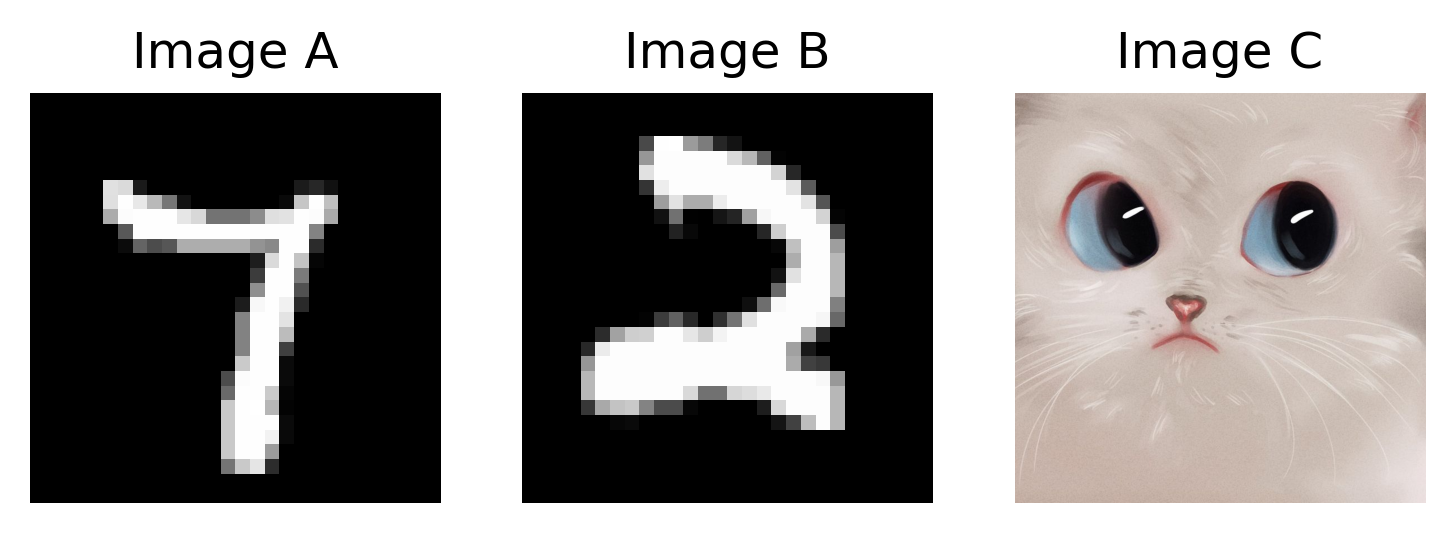  
**Replace the `...`** in the following cell with your answer **then execute it**.  
!!!

In [ ]:
Answer_Image_A = ...
Answer_Image_B = ...
Answer_Image_C = ...

# DO NOT TOUCH THIS LINE
validation_question_faineant()

!!! info The percentage error: a way to evaluate your algorithm  
The lower the percentage error, the better is your solution.  
  
$$\text{percentage error} = \frac{\text{Number of misclassified images}} {\text{Total number of images}} \times 100$$  
A misclassified image is one for which the algorithm gave a prediction different from the true class of the image:  
$$\hat r \neq r$$  
!!!


In [ ]:
display_bank(showPredictions=True)

validation_execution_calcul_score()

!!! question What is the algorithm's percentage error of the first 10 images?  
Calculate the percentage error of the algorithm. **Replace the `...`** in the following cell with your answer (only the number without the %) **then execute it**.  
!!!

In [ ]:
error_10 = ...

# DO NOT TOUCH THIS LINE
validation_question_score_fixe()

!!! tip Error on all the images  
Run the following cell to compute the percentage error on all data.  
!!!

In [ ]:
compute_score_step_1()

## Numerical Image

!!! abstract What is an image?  
To lower our error, our algorithm must "look at" the image. We need to understand what an image is for the computer.  
!!!
!!! tip Calculations on the image  
For the computer, an image is an array of numbers. Each number corresponds to a pixel of the image. Each pixel has a value between 0 and 255, 0 for black and 255 for white.  
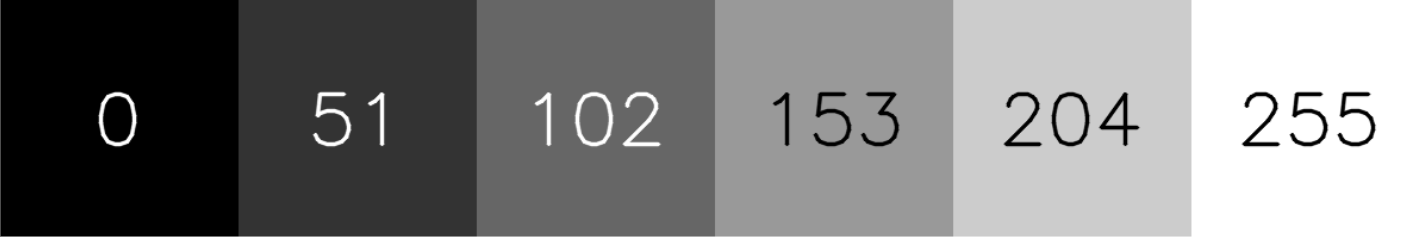  
Run the following cell to display the image.  
!!!

In [ ]:
display_image(d)
display_table(d)

validation_execution_affichage()

!!! question What is the value of pixel (18,15)?  
Read the value of the pixel at position (18,15) in the table and fill in its value **in place of the `...`** in the cell below **then execute it**.  
Note: The first coordinate is the row number, the second is the column number: (row, column).  
!!!

In [ ]:
pixel = ...

# DO NOT TOUCH THIS LINE
validation_question_pixel()

!!! question Turn pixel (17,15) into a black pixel  
**Replace the `...` below** with the new value to give to the pixel so that it is black **then execute it**.  
!!!

In [ ]:
d[17,15] = ...

# DO NOT TOUCH THESE LINES
validation_question_pixel_noir()
display_image(d,(17,15))
display_table(d,(17,15))

## Features

### Feature computation

!!! info Feature of an image  
To lower our error, our algorithm must now use the image instead of guessing.  
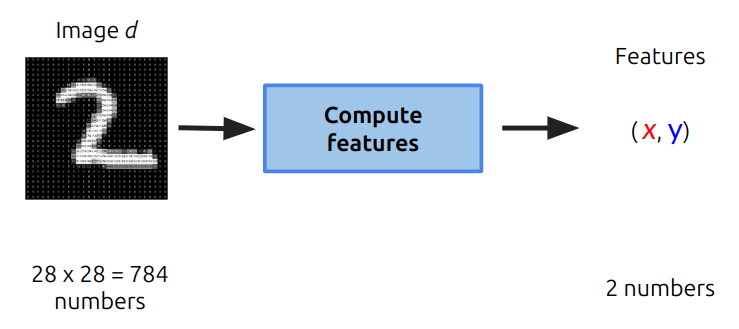  
The features denoted $x, y, ...$ allow us to simplify the image by having fewer numbers.  
!!!

!!! tip The mean  
To summarize the values of certain pixels into a single value, we compute the mean of these pixels.  
!!!

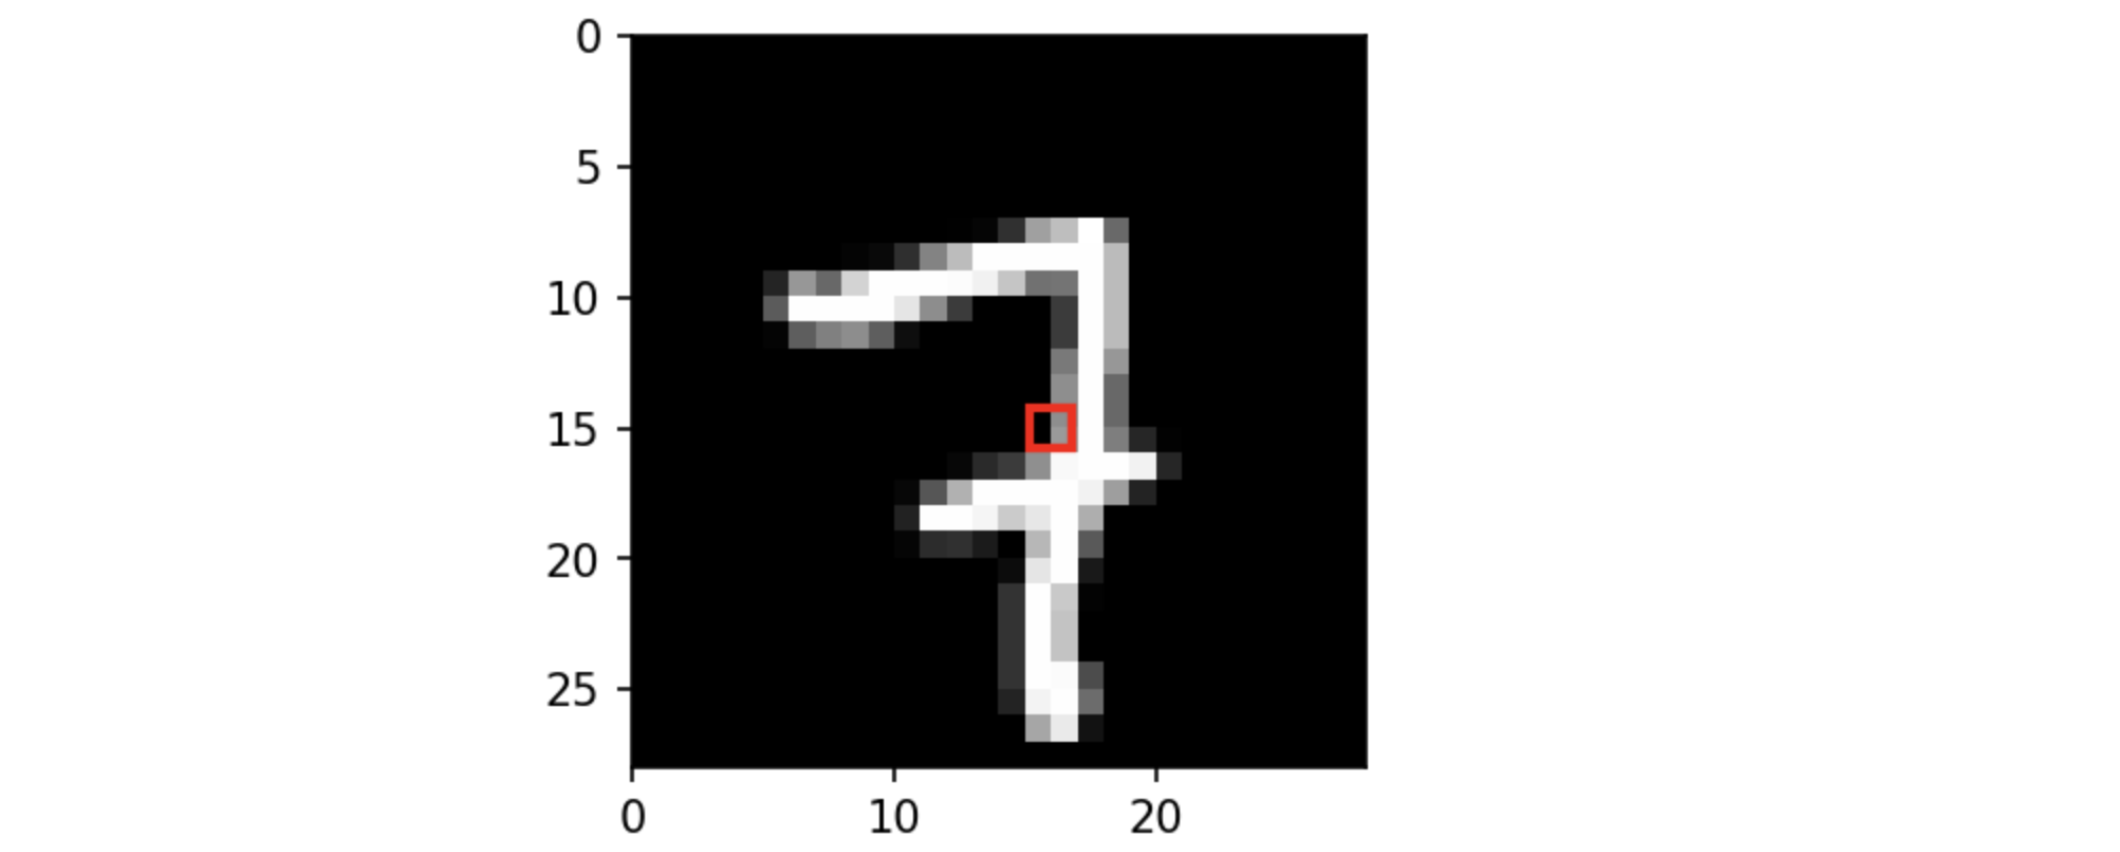  
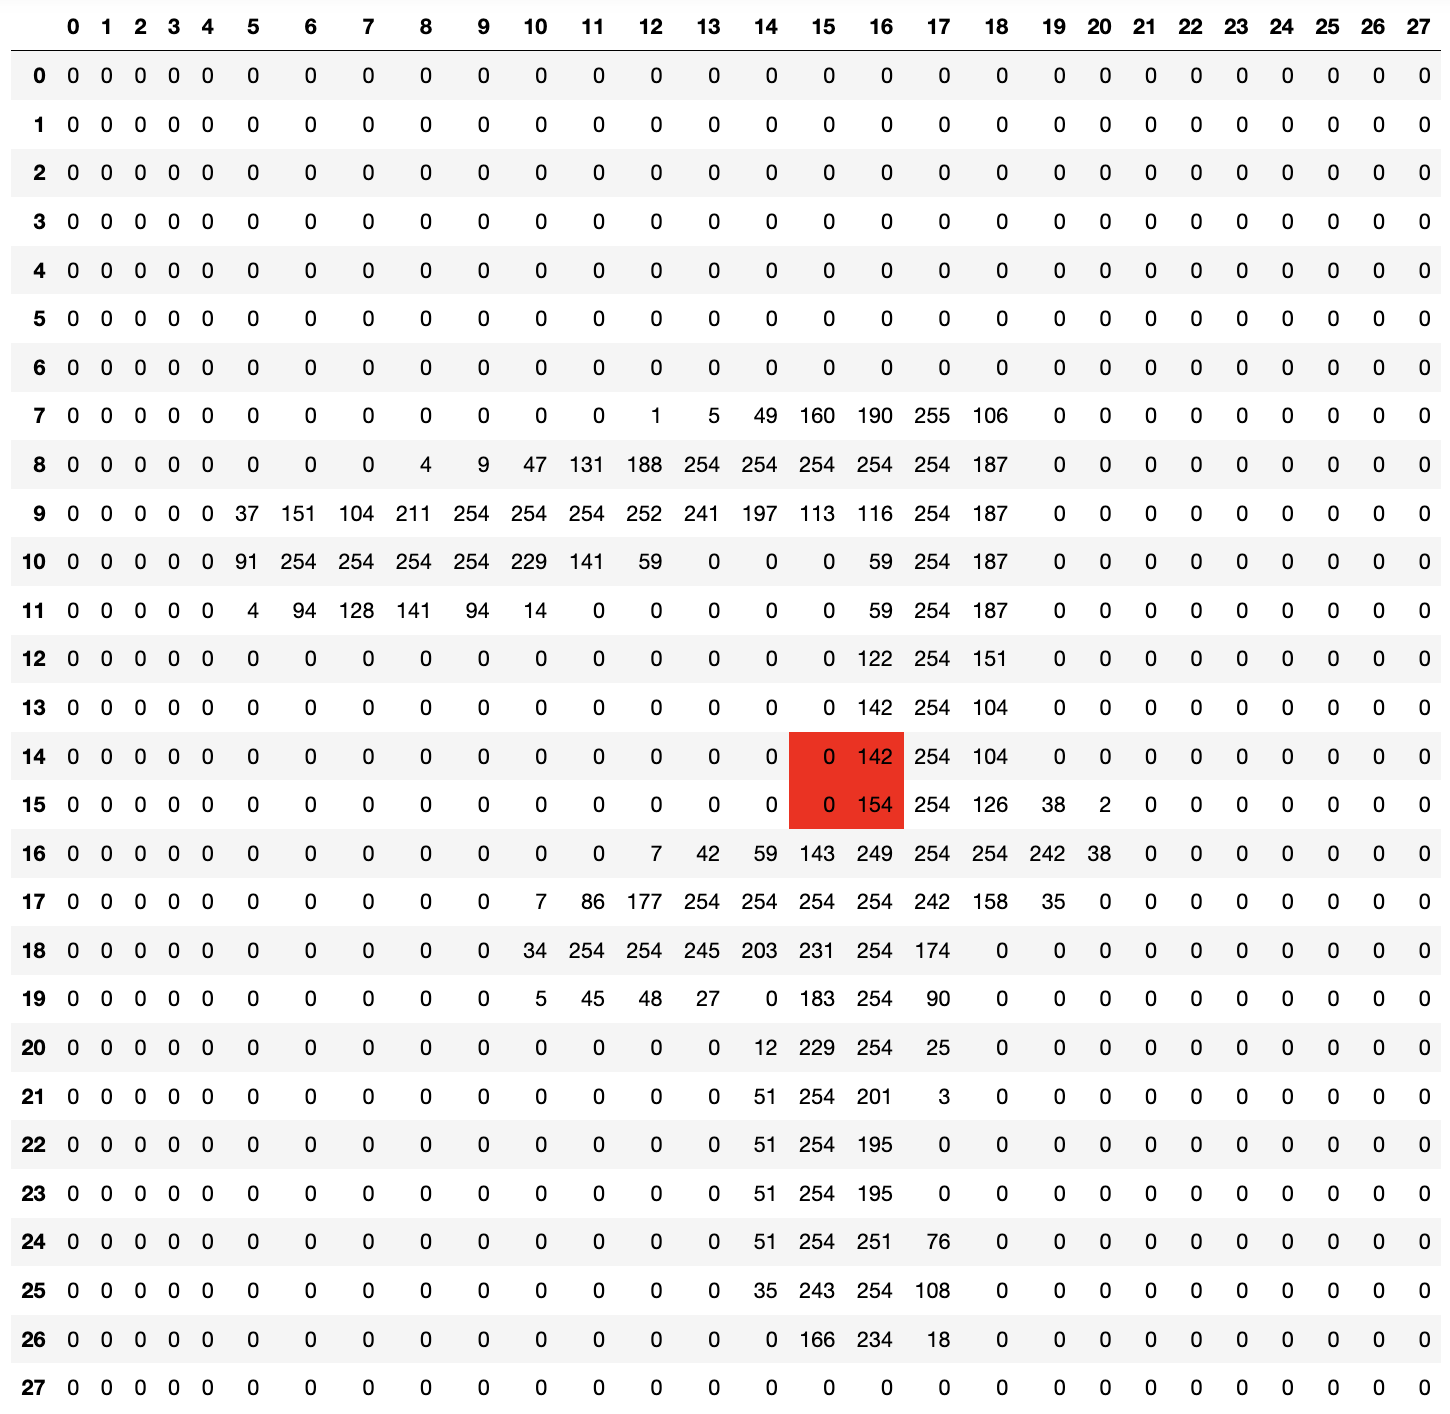
!!! question Calculate the mean over the red pixels  
Calculate the mean of the pixels in the area highlighted in red. Provide your answer **in place of the `...`** in the cell below **then execute it**.  
!!!

In [ ]:
mean_zone_4pixels = ...

# DO NOT TOUCH THIS LINE
validation_question_moyenne()

!!! tip Mean over 2 different zones  
We will start with two reference features: the mean over the upper half of the image and the mean over the lower half.  
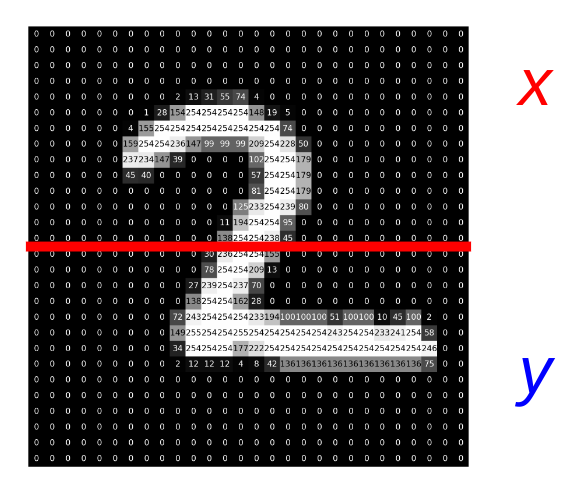  
Run the following cell to display the features.  
!!!

In [ ]:
display_2_geo()

validation_execution_2_caracteristiques()

!!! question Which image corresponds to each pair ($x,y$)?  
We have calculated for the two images above their features $(x,y)$. Look at the two images and the table to deduce which image corresponds to each pair of means $(x,y)$.  
**Replace the `...`** in the following cell with 2 and 7 in the correct order **then execute it**.  
!!!

In [ ]:
r1 = ...
r2 = ...

# DO NOT TOUCH THIS LINE
validation_question_2_caracteristiques()

### Visualizing in 2D plane

!!! info Visualization in the plane  
We now have 2 values $(x, y)$ associated with each image. We can plot the images in a plane using x and y as coordinates.  
Run the following cell to display the points.  
!!!

In [ ]:
plot_2_points()
validation_execution_2_points()

!!! question Provide the coordinates $(x, y)$ of points A and B  
Fill in the coordinates in the following cell **then execute it**. Rounded values are acceptable.  
!!!

In [ ]:
A = (..., ...)

B = (..., ...)

# DO NOT TOUCH THIS LINE
validation_question_2_points()

!!! info Point clouds  
We will now study the distribution in the plane of the feature values for 2 and for 7. The more discriminating our features are, the more we can observe 2 distinct clusters (groups) of points.  
Run the following cell to display the clusters.  
!!!

In [ ]:
plot_200_points()
validation_execution_200_points()

!!! question Which point cloud corresponds to which class of the image?  
In your opinion, do the blue points correspond to images of 2 or 7? **Replace the `...`** in the following cell with 2 or 7 in the correct order **then execute it**  
!!!

In [ ]:
blue_points_class = ...
orange_points_class = ...

# DO NOT TOUCH THIS LINE
validation_question_couleur()

### Classification

!!! info Classification  
Classification is the last step of the algorithm. We need a way to answer 2 or 7 based on the features $x, y$.  
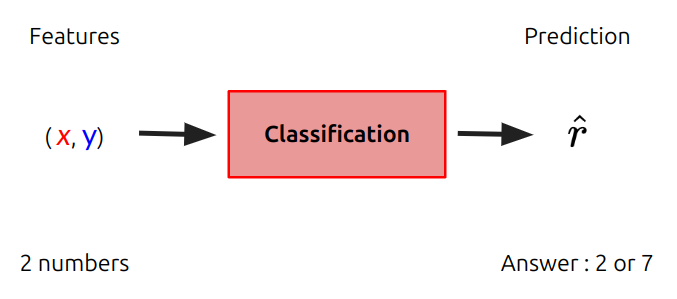  
!!!
!!! info Dividing the plane with a line  
In two dimensions, we can use a line to separate the points into two groups. The equation of the line is of the form  
$$y = mx + p$$  
We express $y$ as a function of $x$ with two parameters:  
- $m$: the slope of the line  
- $p$: the y-intercept of the line, i.e., the value of $y$ for $x = 0$  
  
Run the following cell to visualize the line.  
!!!

In [ ]:
plot_10_points_line()
validation_execution_10_points()

!!! question What is the percentage error on this diagram?  
Calculate the percentage error for these 10 images. The points above the line are classified as 2 by the algorithm and those below as 7.  
**Replace the `...`** in the following cell with your answer (only the number without the %) **then execute it**.  
!!!

In [ ]:
error_10 = ...

# DO NOT TOUCH THIS LINE
validation_question_score_droite()

!!! tip Your turn  
Use the sliders to adjust the parameters $m$ and $p$ to find a good separating line.  
!!!

In [ ]:
plot_points_line()

validation_execution_tracer_points_droite()

!!! question Find a line achieving less than 8% error  
Adjust the parameters $m$ and $p$ to find a good separating line. The percentage error is the proportion of points from one group that are on the wrong side of the line.  
When you have found a good line, **execute the following cell** to proceed.  
!!!

In [ ]:
compute_score_line()

#### Error computing details

!!! abstract Linear Classification  
To perform classification with the line:  
- We chose 2 parameters $m$ and $p$ to define a line separating the two classes  
- We determined that the algorithm should estimate $\hat r = 2$ for points above the line  
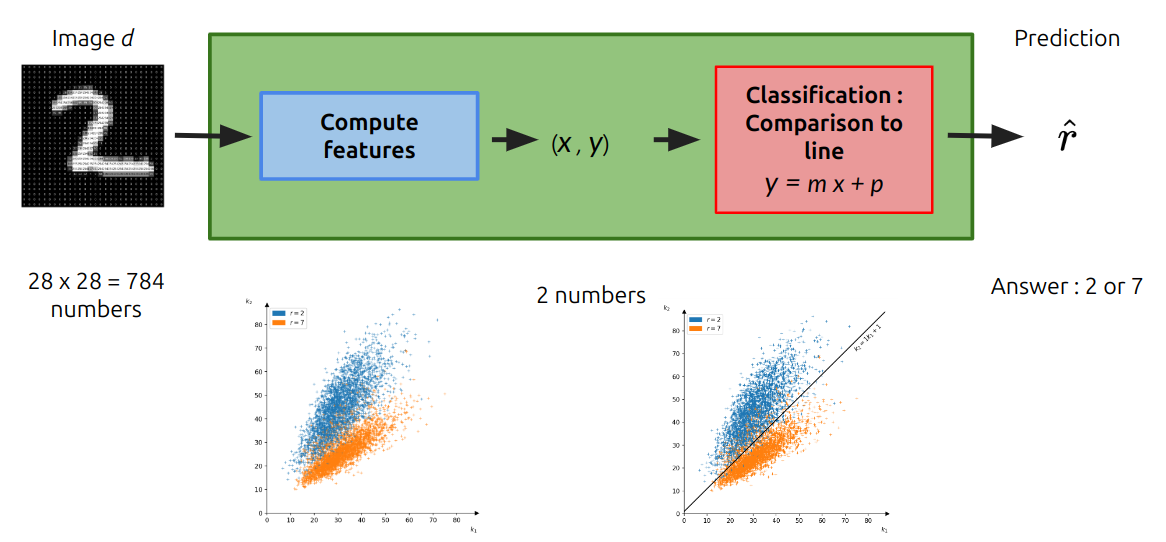  
!!!
!!! info How does the computer know if a point is above the line?  
The computer cannot make visual comparisons. It must perform calculations with the coordinates of the points and the equation of the line.  
Run the following cell to see the calculations.  
!!!

In [ ]:
plot_point_line()
validation_execution_point_droite()

!!! question What are the coordinates of point M?  
We want to know if point $A$ is below or above the line, based on its coordinates.  
We introduce point $M$: same x-coordinate as $A$ but lies on the line.  
**Using the equation of the line**, fill in the coordinates of $M$ in the cell below.  
!!!

In [ ]:
x_M = ...
y_M = ...

# DO NOT TOUCH THIS LINE
validation_question_equation()

## Let's find better features

!!! tip New image zones  
We will now try to calculate features from different zones on the image to see how it affects the percentage error.  
!!!

In [ ]:
A_1 = (7, 7)       # <- coordinates for point A1
B_1 = (20, 20)     # <- coordinates for point B1


A_2 = (14, 14)     # <- coordinates for point A2
B_2 = (23, 23)     # <- coordinates for point B2



# DO NOT TOUCH THESE LINES
display_custom_zones(A_1, B_1, A_2, B_2)

validation_execution_def_caracteristiques_ripou()

!!! question What do you think about the point clouds associated with these two zones?  
Are the point clouds well separated?  
Why do you think that is?  
Observe the two zones by going back to the previous cell to help you answer.  
  
Execute the following cell to continue.  
!!!

In [ ]:
validation_execution_scatter_caracteristiques_ripou()

!!! question Change the selected zones to define your own features  
**Execute the next cell** and select your two zones on the images.  
Click button zone1 or zone2 to choose which zone you want to set, then drag the mouse on one image to select the corresponding zone.  
Once you are happy with your 2 zones, set **below** the parameters to define a good separating line.  
!!!

In [ ]:
display_customization()

validation_execution_caracteristiques_custom()

!!! question Find a line achieving less than 6% error  
Adjust the parameters $m$ and $p$ to find a good separating line. The percentage error is the proportion of points from one group that are on the wrong side of the line.  
**Execute the following cell** to continue when you have less than 6% error. To do this, you need to find two good zones and adjust the line.  
!!!

In [ ]:
compute_score_custom_line()

!!! abstract End of Notebook  
In this lab, you have:  
  
- Used two features for each image  
- Plotted the images in a plane using these two values as coordinates  
- Used a line to separate the points into two groups  
- Optimized the line parameters to minimize your error  
  
Continue looking for good zones to lower your error. You can achieve less than 3% error!  
!!!